<a href="https://colab.research.google.com/github/Piyush01Bhatt/Deep-Learning/blob/master/Sentiment_Classification_Using_Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pip install tensorflow==2.0.0-beta0

In [0]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tf.__version__

'2.0.0-beta0'

In [0]:
vocab_size = 3000
embedding_dim = 64
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<oov>"
training_size = 20000

In [0]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

--2019-07-19 12:45:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2019-07-19 12:45:34 (120 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
with open('/tmp/sarcasm.json','r') as f:
  data = json.load(f)

sentences = []
labels = []

for item in data:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [0]:
print(f'Length of sentences = {len(sentences)}')

Length of sentences = 26709


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from wordcloud import WordCloud

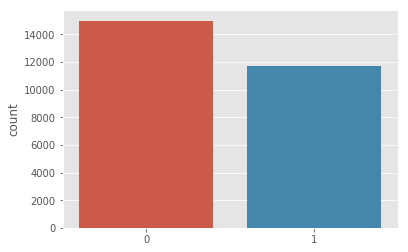

In [0]:
sns.countplot(labels)

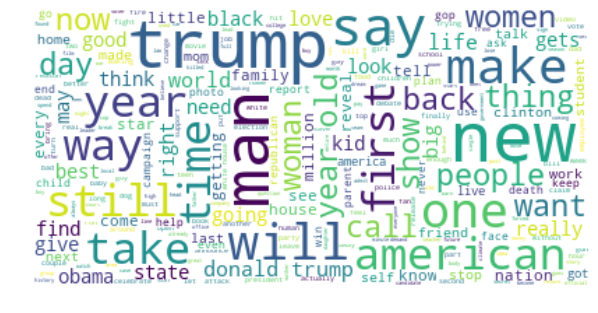

In [0]:
e_text = ""
wordcloud = WordCloud(max_font_size=50, max_words=vocab_size, background_color="white").generate(e_text.join(sentences))
plt.figure(figsize=(10,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
trainX = sentences[0:training_size]
trainY = labels[0:training_size]
testX = sentences[training_size:]
testY = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(trainX)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(trainX)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testX)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating = trunc_type)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 32, 64)            192000    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 196,225
Trainable params: 196,225
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 30

history = model.fit(training_padded, trainY, epochs = num_epochs, 
                   validation_data = (testing_padded, testY), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.4811 - accuracy: 0.7545 - val_loss: 0.3719 - val_accuracy: 0.8343
Epoch 2/30
20000/20000 - 3s - loss: 0.3159 - accuracy: 0.8618 - val_loss: 0.3608 - val_accuracy: 0.8393
Epoch 3/30
20000/20000 - 3s - loss: 0.2866 - accuracy: 0.8777 - val_loss: 0.3998 - val_accuracy: 0.8214
Epoch 4/30
20000/20000 - 3s - loss: 0.2721 - accuracy: 0.8854 - val_loss: 0.3819 - val_accuracy: 0.8354
Epoch 5/30
20000/20000 - 3s - loss: 0.2632 - accuracy: 0.8866 - val_loss: 0.3925 - val_accuracy: 0.8325
Epoch 6/30
20000/20000 - 3s - loss: 0.2579 - accuracy: 0.8910 - val_loss: 0.3999 - val_accuracy: 0.8317
Epoch 7/30
20000/20000 - 3s - loss: 0.2528 - accuracy: 0.8953 - val_loss: 0.4110 - val_accuracy: 0.8277
Epoch 8/30
20000/20000 - 3s - loss: 0.2494 - accuracy: 0.8949 - val_loss: 0.4238 - val_accuracy: 0.8231
Epoch 9/30
20000/20000 - 3s - loss: 0.2425 - accuracy: 0.8981 - val_loss: 0.4158 - val_accuracy: 0.8256
Epoch 10/30
200

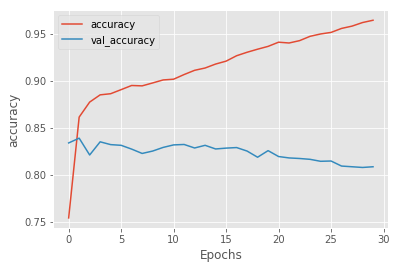

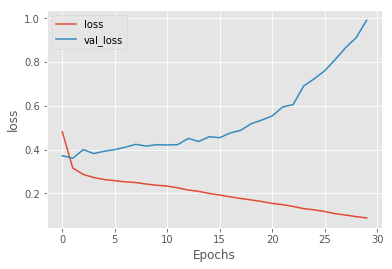

In [0]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')